In [12]:
# 1)-Import necessary libraries
import pandas as pd
import random
import os
import statistics as st
import math

In [13]:
%config IPCompleter.greedy=True


In [14]:

current_folder = os.getcwd()
print(current_folder)

/work


In [15]:
# 2)-Retrieve the names of the 22 files and assign them to a List variable
# You would need to filter out other files
# Display the names of these 22 files
#file_list = os.listdir('./data/CollegeScorecard_Raw_Data')
#file_list
merged_files = [file for file in file_list if 'MERGED' in file]
merged_files


['MERGED2015_16_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2014_15_PP.csv']

In [16]:
# 3)-Write code to randomly select one file name out of the 22 files names. 
# Hint: generate a random integer between 0 and 21 first
# Display the file name
random_file=random.choice(os.listdir("./data/CollegeScorecard_Raw_Data"))
random_file

'MERGED1999_00_PP.csv'

In [17]:
# 4)-Only read the two columns: college name (INSTNM) and in state tution ("TUITIONFEE_IN")
# from this file into a data frame aand display use info() function to display a summary information
df = pd.read_csv("./data/CollegeScorecard_Raw_Data/MERGED2009_10_PP.csv",usecols=['INSTNM','TUITIONFEE_IN'])
df.head()

,INSTNM,TUITIONFEE_IN
0,Community College of the Air Force,NaN
1,Alabama A & M University,4692.0
2,University of Alabama at Birmingham,5096.0
3,Amridge University,8000.0
4,University of Alabama in Huntsville,6510.0


In [18]:
# 5)-Find out how many observations have missing value.
df.isnull().sum()

INSTNM              0
TUITIONFEE_IN    2928
dtype: int64

In [19]:
# 6)- Drop those observations with missing value
# Disaply the number of observations afterward
df = df.dropna() 
df.shape

(4289, 2)

In [20]:
# 7)- Find out how many observations have 0 tution.
zero_tuition = df[df['TUITIONFEE_IN']==0]
zero_tuition.shape

(5, 2)

In [21]:
# 8) - Drop those observations with 0 tuition
# Disaply the number of observations afterward
df = df[df['TUITIONFEE_IN']!=0]
df.shape

(4284, 2)

In [22]:
# 9)- Calculate and display the mean (average) of the tuitions of all the remaining observations
average_fee = st.mean(df['TUITIONFEE_IN'])
print('Average Tuition Fees ', average_fee )

Average Tuition Fees  12067.689775910365


In [23]:
# 10)- Randomly select just 1 observation from the data frame.
# Display the tuition of that observation.
row = df.sample() 
row

,INSTNM,TUITIONFEE_IN
6025,University of Phoenix-Charlotte Campus,9792.0


In [24]:
# 11)-Calculate the different between the tuition of this observation and 
# the mean tuition off all observations calculated earlier.
# Display the difference
print(row['TUITIONFEE_IN']-average_fee)

6025   -2275.689776
Name: TUITIONFEE_IN, dtype: float64


In [25]:
# 12 - Repeat 10 to 11 several times get the feel of the size of the difference in means
# 13)-Randomly select 20 observations, display the tuition of these observation.
random_observations = df.sample(20)
random_observations

,INSTNM,TUITIONFEE_IN
3822,Jackson State Community College,2953.0
3492,Harrisburg Area Community College,3480.0
3573,Pennsylvania State University-Penn State DuBois,12130.0
1551,Daymar College-Owensboro,13195.0
3710,Clemson University,11078.0
1799,Boston University,38440.0
3823,John A Gupton College,8920.0
4930,Institucion Chaviano de Mayaguez,5855.0
301,Coastline Community College,650.0
2454,Rowan University,11234.0


In [26]:
# 14)-Calculate and display the mean tuition of these 20 observations
mean_random_obs = st.mean(random_observations['TUITIONFEE_IN'])
print('Average Tuition fee of Random Observations :', mean_random_obs)

Average Tuition fee of Random Observations : 12291.25


In [27]:
# 15)-Calculate  the difference between the average tuition of these 20 observations 
# and the mean tuition off all observations calculated earlier.
# Display the difference
# 16)- - Repeat 13 to 15 several times and get the feel of the size of the difference in means 

mean_diff = mean_random_obs-average_fee
print('Difference between Random observations and previous observations ',mean_diff)

Difference between Random observations and previous observations  223.56022408963508


In [28]:
# 17)-write function Code here
def mean_difference(x,y):
    random_observations = y.sample(x)
    mean_random_obs = st.mean(random_observations['TUITIONFEE_IN'])
    total_mean = st.mean(y['TUITIONFEE_IN'])
    return abs(mean_random_obs-total_mean)

In [29]:
# 18)- Test the function by passing a sample size and the name of the dataframe
# Dsplay the return of the function
random_sample = 30
print('Mean of random sample: ',mean_difference(30,df))

Mean of random sample:  619.6231092436974


In [30]:

# 19)- Create a list of sequence numbers from 1 to 50, name it "sample_sizes";
# display it to make sure its members are from 1 to 50
sample_sizes = [i for i in range(1,51)]
print(sample_sizes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [31]:
# 20)- Create an empty list and name it "means_diff" for differences of population mean and sample means;
# Loop through the list sample_sizes:
# For each element in the sample size list, obtain a random sample of that size from the data frame;
# Calculate the sample mean 
# Calculate the difference between the population mean and the sample mean
# Append the difference to the list "means_diff"
# Display the list "means_diff" after the loop is completed

def calculateMeanDifference(sample_sizes,df):
    means_diff = []
    population_mean = st.mean(df['TUITIONFEE_IN'])
    for i in sample_sizes:
        sample_df = df.sample(i)
        sample_mean = st.mean(sample_df['TUITIONFEE_IN'])
        means_diff.append(abs(sample_mean-population_mean))
    return means_diff
    
print('Means_diff List after the loop :')
means_diff = calculateMeanDifference(sample_sizes,df)
print(means_diff)

Means_diff List after the loop :
[21052.310224089633, 1882.689775910365, 490.6897759103649, 5481.189775910365, 513.1102240896344, 4737.810224089635, 259.11834733893556, 3841.310224089635, 2984.0880018674125, 6647.7102240896365, 2536.401133180545, 199.43977591036492, 888.8486856280961, 154.40406162465115, 2389.310224089635, 886.0022759103649, 1871.3956582633054, 901.9213352007464, 1206.00556538405, 3612.489775910364, 2425.976890756301, 1713.764769544181, 1417.2667458287651, 4716.685224089635, 1037.8097759103657, 1291.6128528334411, 2892.902816682228, 2807.0245098039213, 2259.931155220709, 2141.143557422969, 3165.8510662329463, 4704.341474089635, 2463.417048637637, 1457.045518207282, 1391.367366946777, 88.49533146591966, 154.85193807252654, 2607.49443461595, 633.9461861667751, 237.6147759103642, 163.3346143335384, 3415.7387955182057, 4265.340938701062, 689.917048637637, 573.0435574229687, 23.320210692972978, 933.6506496215497, 2017.7893907563011, 2012.228591436573, 894.350224089636]


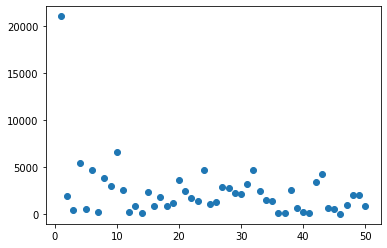

In [32]:

# 21)- Make a scatter plot with sample size on the x-axs and  mean difference on the y-axis
# Observe as the sample size increases, the sample means converge to the population mean.
# Make sure you make the plot large enough
import matplotlib.pyplot as plt
plt.scatter(sample_sizes,means_diff)

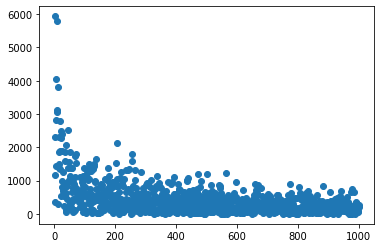

In [33]:
# 22)- repeat 18 to 21 by replacing 50 with a larger number. For example, 300, or even 1000.
# and see how the plot looks.
sample_sizes = [i for i in range(1,1001)]
means_diff = calculateMeanDifference(sample_sizes,df)
plt.scatter(sample_sizes,means_diff)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=228dab0f-cd07-447f-a16a-a93d7558780d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>